In [1]:
import tushare as ts
import pandas as pd
import numpy as np
import math

In [2]:
db = ts.get_hist_data('600000',start='2017-01-01',end='2018-01-01')

In [3]:
db

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2017-12-29,12.52,12.62,12.59,12.51,163518.27,0.05,0.40,12.598,12.642,12.757,214973.83,203101.34,295878.94,0.06
2017-12-28,12.60,12.66,12.54,12.53,238708.23,-0.08,-0.63,12.604,12.646,12.774,214424.05,202959.62,306991.75,0.08
2017-12-27,12.65,12.66,12.62,12.53,327318.81,-0.02,-0.16,12.636,12.661,12.792,208787.18,195230.47,315014.51,0.12
2017-12-26,12.57,12.66,12.64,12.56,152257.22,0.05,0.40,12.654,12.674,12.807,196603.11,181843.93,319571.96,0.05
2017-12-25,12.61,12.68,12.60,12.56,193066.62,-0.02,-0.16,12.676,12.685,12.823,202950.87,196988.30,328975.06,0.07
2017-12-22,12.68,12.72,12.62,12.61,160769.38,-0.08,-0.63,12.686,12.722,12.848,191228.84,214331.55,358946.86,0.06
2017-12-21,12.67,12.78,12.70,12.60,210523.88,-0.03,-0.24,12.688,12.752,12.871,191495.18,229550.83,380714.64,0.07
2017-12-20,12.76,12.76,12.71,12.60,266398.44,-0.04,-0.31,12.686,12.778,12.889,181673.76,243300.67,411144.74,0.09
2017-12-19,12.65,12.76,12.75,12.62,183996.03,0.10,0.79,12.694,12.803,12.915,167084.75,260225.76,455112.95,0.07


In [4]:
X = pd.DataFrame()

In [5]:
X['open'] = db['open']
X['close'] = db['close']
X['ma5'] = db['ma5']
X['volume'] = db['volume']

In [6]:
X = np.array(X)[1:]

In [7]:
y = np.array(db['close'][:-1])

In [8]:
from sklearn.linear_model import Ridge

In [9]:
clf = Ridge(alpha=1.0)

In [10]:
clf.fit(X,y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [11]:
db2 = ts.get_hist_data('600000',start='2018-01-01',end='2018-03-01')

In [12]:
tX = pd.DataFrame()
tX['open'] = db2['open']
tX['close'] = db2['close']
tX['ma5'] = db2['ma5']
tX['volume'] = db2['volume']
tX = np.array(tX)[1:]

In [13]:
ty = np.array(db2.close[:-1])

In [24]:
prediction = clf.predict(tX)

In [25]:
prediction

array([ 12.49330736,  12.68205558,  12.71945236,  12.70170493,
        12.61691911,  12.49735663,  12.54871689,  12.56618514,
        12.77855093,  13.10451704,  13.35263386,  13.31540181,
        13.33353543,  13.13297261,  13.20684224,  13.12847357,
        13.12893374,  13.38180298,  13.32366538,  13.51262623,
        13.28066689,  12.79703467,  12.6895066 ,  13.16080503,
        13.16181613,  13.02184424,  12.89282855,  12.98142519,
        12.91165705,  12.92854254,  12.92893004,  12.71561469,
        12.69059121,  12.69473423,  12.67311301,  12.67728563,  12.71518277])

In [26]:
date_index = db2.index[:-1]
date_index = pd.to_datetime(date_index)

In [27]:
ty.index=date_index

In [28]:
clf.score(tX,ty)

0.59310103342970177

In [29]:
import matplotlib.pyplot as plt

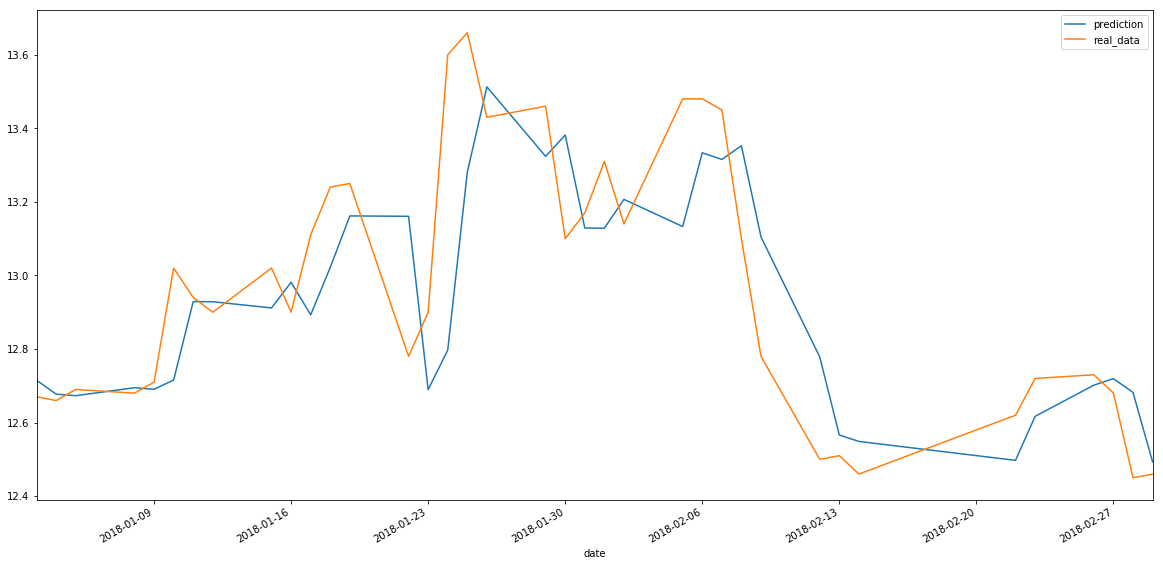

In [30]:
t_result = pd.DataFrame(index = date_index)
t_result['prediction'] = prediction
t_result['real_data'] = ty
t_result.plot(figsize=(20,10))
plt.show()

In [32]:
#http://stockcharts.com/school/doku.php?id=chart_school:technical_indicators